# MNIST Analysis

## Load dataset

In [1]:
from torch.utils.data import TensorDataset, DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import torch
from utils_dataset import ToCurrent, load_MNIST, set_random_seed
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

seed = 42
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
generator = set_random_seed(seed, add_generator=True, device=device)
shuffle_data = False

folder = Path('dataset_analysis')
folder_run = Path(os.path.join(folder,'MNIST'))
folder_fig = folder_run.joinpath('fig')
folder_data = folder_run.joinpath('data')
folder_fig.mkdir(parents=True, exist_ok=True)
folder_data.mkdir(parents=True, exist_ok=True)

In [2]:
dataset_train = MNIST(root="data", train=True, download=True)
dataset_test = MNIST(root="data", train=False, download=True)

In [3]:
print(f'Classes: {dataset_train.classes}')
print(f'N classes: {len(dataset_train.classes)}')
print(f'N training samples: {len(dataset_train)}')
print(f'N test samples: {len(dataset_test)}')
print(f'Size samples: {dataset_train.data.shape[1]*dataset_train.data.shape[2]}')

n_classes = len(dataset_train.classes)
n_pixels = dataset_train.data.shape[2]

Classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
N classes: 10
N training samples: 60000
N test samples: 10000
Size samples: 784


#### Dataloader:

In [4]:
batch_size_train = 10
batch_size_test = 10

# Transformation: threshold pixel grayscale values 
threshold_grayscale = 160
vmin, vmax = 0, 255

# Train:
train_loader = DataLoader(MNIST(root='data', train=True, download=True, 
                                transform=transforms.Compose([transforms.PILToTensor()])), 
                          batch_size=batch_size_train, 
                          shuffle=shuffle_data, 
                          generator=generator)

# Test:
test_loader = DataLoader(MNIST(root='data', train=False, download=True, 
                               transform=transforms.Compose([transforms.PILToTensor()])),
                         batch_size=batch_size_test, 
                         shuffle=shuffle_data,
                         generator=generator)

In [5]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [6]:
example_data.shape

torch.Size([10, 1, 28, 28])

In [7]:
example_data[0,]

tensor([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
           18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,

# Visualize dataset:

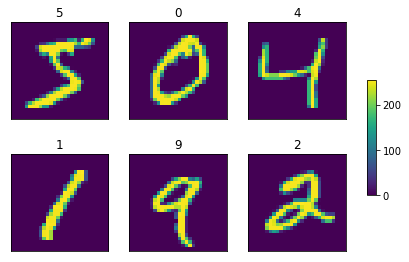

In [8]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    im = plt.imshow(example_data[i][0], interpolation='none', vmin=0, vmax=255)
    plt.title("{}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.3, 0.02, 0.4])
fig.colorbar(im, cax=cbar_ax)
fig.savefig(folder_fig.joinpath(f'MNIST_samples.pdf'), format='pdf', dpi=300)

## Map to Current

In [9]:
batch_size_train = 10
batch_size_test = 10

# Transformation:
stim_len_sec = 3
dt_sec = 1e-2
v_max = 0.2

# Train:
train_loader = DataLoader(MNIST(root='data', train=True, download=True, 
                                transform=transforms.Compose([transforms.PILToTensor(), 
                                                              ToCurrent(stim_len_sec, dt_sec, v_max)])), 
                          batch_size=batch_size_train, 
                          shuffle=shuffle_data, 
                          generator=generator)

# Test:
test_loader = DataLoader(MNIST(root='data', train=False, download=True, 
                               transform=transforms.Compose([transforms.PILToTensor(),
                                                             ToCurrent(stim_len_sec, dt_sec, v_max)])),
                         batch_size=batch_size_test, 
                         shuffle=shuffle_data, 
                         generator=generator)

300
300


In [10]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [11]:
example_data[0]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

## Visualize dataset:

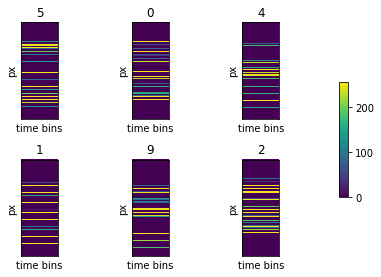

In [12]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    im=plt.imshow(torch.transpose(example_data[i][0], 1,0), interpolation='none', vmin=0, vmax=255+v_max)
    plt.title("{}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('time bins')
    plt.ylabel('px')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.3, 0.02, 0.4])
fig.colorbar(im, cax=cbar_ax)
fig.savefig(folder_fig.joinpath(f'MNIST_samples_post_proc.pdf'), format='pdf', dpi=300)

# Load dataset

In [13]:
train_dl, test_dl = load_MNIST(batch_size=1, stim_len_sec=1, dt_sec=1e-3, v_max=0.2)

1000
N samples training: 60000
1000
N samples test: 10000


In [14]:
import torch
import torch.nn as nn
import argparse
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import trange
import seaborn as sns
import numpy as np
from datasets import load_data
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from numpy.fft import rfft, rfftfreq
import tqdm
import os
from scipy import signal
import json
from torchvision.datasets import MNIST
from dataset_analysis import extract_interval

firing_mode_dict = {
    "FA": {"a": 5, "A1": 0, "A2": 0},
    "SA": {"a": 0, "A1": 0, "A2": 0},
    "MIX": {"a": 5, "A1": 5, "A2": -0.3},
}

g = torch.Generator()

def classifier(data,labels, train_dl, test_dl, epochs=None, batch_size=100, generator=None):
    # data is a numpy array [trials, channels]
    # labels is a numpy array [trials]
    print(f'Len test set {len(test_dl)}')
    
    classifier = nn.Sequential(
        nn.Linear(data.shape[1], len(np.unique(labels))),
    ).to(device)
    optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)
    if epochs is None:
        epochs = trange(100, desc=f"Classifier")
    else:
        epochs.reset()
    batches = tqdm.tqdm(train_dl, desc="Epoch", disable=True)
    loss = nn.CrossEntropyLoss()
    loss_coll = []
    acc_coll = []
    
    list_acc_last_epoch = []
    n_epochs = 100
    for epoch in range(n_epochs):
        loss_list = []
        acc_list = []
        batches.reset()
        batches.set_description('Training')
        
        for batch_idx, (data, target) in enumerate(train_dl):
            data = data.float()
            target = target.long()
            out = classifier(data)
            loss_val = loss(out, target)
            loss_val.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_list.append(loss_val.item())
            batches.update()
            
        batches.reset(total=len(test_dl))
        batches.set_description('Testing')
        
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(test_dl):
                data = data.float()
                target = target.long()
                out = classifier(data)
                
                acc = torch.mean((torch.argmax(out, dim=1) == target).to(torch.int16), dtype=torch.float)
                acc_list.append(acc.item())
                if epoch == (n_epochs-1):
                    list_acc_last_epoch.append(acc.tolist())
                batches.update()
                
        loss_coll.append(np.mean(loss_list))
        acc_coll.append(np.mean(acc_list))
        epochs.set_postfix_str(f"Loss: {np.mean(loss_list):.3f}, Acc: {np.mean(acc_list):.3f}")
        epochs.update()
        
    return loss_coll,acc_coll, list_acc_last_epoch

def classify_fft(data,center,span,labels,labels_ascii_unique,epochs= None,sample_size=10):
    n_samples = data.shape[1]  # number of time steps
    dt = (1 / 100.0)
    b, a = signal.butter(3, 0.1, 'high')
    frange = (center - span / 2, center + span / 2)
    data_fft_coll = []
    for trial in range(data.shape[0]):
        x = signal.filtfilt(b, a, data[trial], axis=1)
        xf = rfftfreq(n_samples, dt)
        yf = rfft(x, axis=0)
        yf = np.abs(yf)
        data_f = extract_interval(yf,xf,sample_size,center,span)
        data_fft_coll.append(data_f)
    data_fft_coll = np.array(data_fft_coll)
    np.save(f'./data/dataset_analysis/data_fft_{center}_{span}.npy', data_fft_coll)    
    loss_coll,acc_coll, list_acc_last_epoch = classifier(data_fft_coll,labels,epochs=epochs)
    return acc_coll[-1], list_acc_last_epoch

In [ ]:
time_length = 300
limited_samples = 2000
data_MNIST = data.data[:limited_samples].flatten(start_dim=1,end_dim=2).unsqueeze(1).repeat(1, time_length, 1)
data_MNIST = data_MNIST.to(torch.float) + torch.randint_like(data_MNIST,high=10)*0.02
train_labels = data.targets[:limited_samples]

In [ ]:
data_MNIST[0].shape

torch.Size([300, 784])

## Preprocessing

In [15]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

#### **1. MNIST digit:**

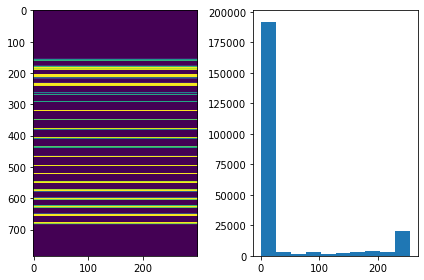

In [29]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(torch.transpose(example_data[0,0,:,:], 1, 0), aspect='auto', interpolation='none')
axs[1].hist(np.array(example_data[0,0,:,:].flatten()))
plt.tight_layout()

In [10]:
# Check power spectradl density of single digits 
# dataset dimensionality as a function of the noise added (PCA + variability)

In [11]:
labels = data.targets[:limited_samples]


Text(0.5, 15.0, 'Frequency (Hz)')

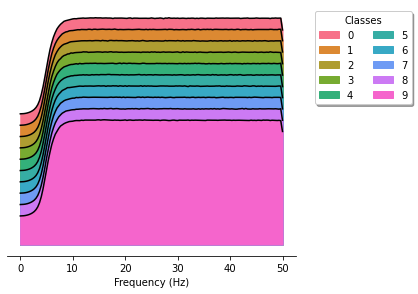

In [12]:
data = data_MNIST
label_ascii = labels
plt.figure()
dt = (1 / 100.0)
idx_letters, indices = np.unique(labels, return_index=True)
b, a = signal.butter(3, 0.1, 'high')
n_samples = data.shape[1]  # number of time steps
colors = sns.color_palette("husl", len(idx_letters))
label_ascii_unique = np.unique(label_ascii)
for letter in range(np.unique(labels).shape[0]):
    # for letter in range(19,21):
    idx_to_plot = np.where(labels == letter)[0]
    x = data[idx_to_plot, :, :]
    x = signal.filtfilt(b, a, x, axis=1)
    xf = rfftfreq(n_samples, dt)
    yf = rfft(x, axis=1)
    y = np.mean(np.mean(np.abs(yf), axis=2), axis=0)
    y = y / np.max(y)
    plt.plot(xf, y + 0.1 * (len(idx_letters) - letter), 'k', zorder=(letter) * 2 + 1)
    
    plt.fill_between(xf, y + 0.1 * (len(idx_letters) - letter), alpha=1, color=colors[letter],
                 label=label_ascii_unique[letter], zorder=(letter) * 2)
plt.yticks([])
plt.legend(fancybox=True, shadow=True, ncol=2, bbox_to_anchor=(1.05, 1), title='Classes')
plt.tight_layout()
# remove top and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel('Frequency (Hz)')

In [13]:
centers = np.linspace(10, 20, 10)
spans=np.linspace(10, 20, 10)
name='frequency'
sample_size = 10

matrix = {}

df_acc = {'center': [], 'span': [], 'acc': []}
matrix[0] = np.zeros((len(centers),len(spans)))
sweep = tqdm.tqdm(total=len(centers)*len(spans), desc=f"{name[0].upper() + name[1:]} Sweeping",position=0,leave=True)
epochs = tqdm.trange(100, desc=f"Classifier",leave=False,position=1)
for c_idx,center in enumerate(centers):
    for s_idx,span in enumerate(spans):
        acc, list_acc_last_epoch = classify_fft(data.numpy(),center,span,labels,epochs,sample_size=sample_size)
        matrix[0][c_idx,s_idx] = acc
        
        df_acc['center'].extend([center]*len(list_acc_last_epoch))
        df_acc['span'].extend([span]*len(list_acc_last_epoch))
        df_acc['acc'].extend(list_acc_last_epoch)
        
        sweep.update()

Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.330, Acc: 0.085]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 39.21it/s, Loss: 2.316, Acc: 0.085]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 51.14it/s, Loss: 2.309, Acc: 0.085]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 59.01it/s, Loss: 2.304, Acc: 0.085]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 59.62it/s, Loss: 2.302, Acc: 0.113]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.353, Acc: 0.105]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 34.71it/s, Loss: 2.329, Acc: 0.105]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 45.53it/s, Loss: 2.315, Acc: 0.105]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 49.45it/s, Loss: 2.307, Acc: 0.105]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 53.66it/s, Loss: 2.303, Acc: 0.105]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.344, Acc: 0.105]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 40.80it/s, Loss: 2.324, Acc: 0.105]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 53.89it/s, Loss: 2.312, Acc: 0.105]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 58.79it/s, Loss: 2.306, Acc: 0.105]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 62.37it/s, Loss: 2.303, Acc: 0.105]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.376, Acc: 0.105]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 42.48it/s, Loss: 2.346, Acc: 0.105]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 47.09it/s, Loss: 2.326, Acc: 0.107]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 51.21it/s, Loss: 2.314, Acc: 0.113]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 52.87it/s, Loss: 2.307, Acc: 0.113]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.374, Acc: 0.085]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 29.19it/s, Loss: 2.350, Acc: 0.085]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 37.51it/s, Loss: 2.335, Acc: 0.085]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 41.77it/s, Loss: 2.324, Acc: 0.107]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:02, 44.24it/s, Loss: 2.317, Acc: 0.112]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.373, Acc: 0.085]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 40.95it/s, Loss: 2.345, Acc: 0.085]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 53.22it/s, Loss: 2.327, Acc: 0.085]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 57.76it/s, Loss: 2.315, Acc: 0.113]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 61.75it/s, Loss: 2.308, Acc: 0.112]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.325, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 39.07it/s, Loss: 2.312, Acc: 0.112]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 50.43it/s, Loss: 2.305, Acc: 0.112]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 50.00it/s, Loss: 2.302, Acc: 0.112]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 50.62it/s, Loss: 2.301, Acc: 0.112]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.355, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 34.06it/s, Loss: 2.330, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 48.35it/s, Loss: 2.315, Acc: 0.110]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 54.96it/s, Loss: 2.307, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 57.49it/s, Loss: 2.303, Acc: 0.107]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.353, Acc: 0.085]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 33.94it/s, Loss: 2.331, Acc: 0.085]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 46.48it/s, Loss: 2.317, Acc: 0.085]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 48.60it/s, Loss: 2.309, Acc: 0.112]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 48.32it/s, Loss: 2.305, Acc: 0.112]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                 | 0/100 [00:00<?, ?it/s, Loss: 263.203, Acc: 0.100]

Classifier:   1%|▋                                                                        | 1/100 [00:00<00:03, 32.39it/s, Loss: 229.007, Acc: 0.090]

Classifier:   2%|█▍                                                                       | 2/100 [00:00<00:02, 39.41it/s, Loss: 203.507, Acc: 0.105]

Classifier:   3%|██▏                                                                      | 3/100 [00:00<00:02, 44.06it/s, Loss: 179.674, Acc: 0.097]

Classifier:   4%|██▉                                                                      | 4/100 [00:00<00:02, 44.66it/s, Loss: 155.135, Acc: 0.100]

Classifier:   5%|███▋                                                                     | 

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.388, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 38.36it/s, Loss: 2.364, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 51.92it/s, Loss: 2.345, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 58.69it/s, Loss: 2.331, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 61.70it/s, Loss: 2.321, Acc: 0.095]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.371, Acc: 0.105]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 35.73it/s, Loss: 2.344, Acc: 0.105]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 42.12it/s, Loss: 2.325, Acc: 0.105]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 45.22it/s, Loss: 2.314, Acc: 0.105]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 50.03it/s, Loss: 2.308, Acc: 0.105]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.357, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:04, 21.77it/s, Loss: 2.332, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:03, 31.65it/s, Loss: 2.317, Acc: 0.100]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 37.55it/s, Loss: 2.309, Acc: 0.100]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:02, 41.21it/s, Loss: 2.304, Acc: 0.088]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.425, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 41.17it/s, Loss: 2.385, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 52.40it/s, Loss: 2.356, Acc: 0.100]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 58.88it/s, Loss: 2.336, Acc: 0.100]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 58.36it/s, Loss: 2.323, Acc: 0.100]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.375, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 25.98it/s, Loss: 2.347, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 36.74it/s, Loss: 2.330, Acc: 0.100]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 42.29it/s, Loss: 2.318, Acc: 0.100]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:02, 45.90it/s, Loss: 2.311, Acc: 0.098]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.442, Acc: 0.090]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 39.65it/s, Loss: 2.398, Acc: 0.090]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 52.89it/s, Loss: 2.366, Acc: 0.090]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 59.14it/s, Loss: 2.343, Acc: 0.090]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 58.73it/s, Loss: 2.328, Acc: 0.090]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.458, Acc: 0.085]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 27.27it/s, Loss: 2.409, Acc: 0.085]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 36.79it/s, Loss: 2.372, Acc: 0.085]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 40.79it/s, Loss: 2.348, Acc: 0.085]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:02, 43.69it/s, Loss: 2.331, Acc: 0.085]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.414, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 40.04it/s, Loss: 2.374, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 51.30it/s, Loss: 2.347, Acc: 0.100]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 50.87it/s, Loss: 2.329, Acc: 0.100]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 52.20it/s, Loss: 2.318, Acc: 0.100]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.446, Acc: 0.110]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 32.19it/s, Loss: 2.401, Acc: 0.110]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 42.48it/s, Loss: 2.368, Acc: 0.110]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 50.16it/s, Loss: 2.346, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 55.12it/s, Loss: 2.330, Acc: 0.110]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.388, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 38.39it/s, Loss: 2.354, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 50.44it/s, Loss: 2.332, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 55.08it/s, Loss: 2.317, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 58.01it/s, Loss: 2.309, Acc: 0.095]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.328, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 39.47it/s, Loss: 2.315, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 52.04it/s, Loss: 2.308, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 58.82it/s, Loss: 2.303, Acc: 0.113]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 62.62it/s, Loss: 2.301, Acc: 0.112]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.361, Acc: 0.087]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 29.33it/s, Loss: 2.335, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 37.76it/s, Loss: 2.319, Acc: 0.110]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 44.44it/s, Loss: 2.310, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 48.83it/s, Loss: 2.305, Acc: 0.110]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.351, Acc: 0.107]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 28.15it/s, Loss: 2.328, Acc: 0.107]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 37.06it/s, Loss: 2.314, Acc: 0.125]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 41.46it/s, Loss: 2.307, Acc: 0.112]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:02, 44.33it/s, Loss: 2.303, Acc: 0.113]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.376, Acc: 0.112]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 28.51it/s, Loss: 2.348, Acc: 0.112]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 37.53it/s, Loss: 2.329, Acc: 0.113]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 42.50it/s, Loss: 2.318, Acc: 0.113]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:02, 45.29it/s, Loss: 2.311, Acc: 0.113]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.345, Acc: 0.090]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 29.19it/s, Loss: 2.325, Acc: 0.090]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 39.29it/s, Loss: 2.313, Acc: 0.113]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 43.74it/s, Loss: 2.306, Acc: 0.113]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:02, 46.23it/s, Loss: 2.303, Acc: 0.110]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.382, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 39.09it/s, Loss: 2.351, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 51.12it/s, Loss: 2.331, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 56.49it/s, Loss: 2.318, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 55.01it/s, Loss: 2.310, Acc: 0.095]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.369, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 36.64it/s, Loss: 2.342, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 50.19it/s, Loss: 2.323, Acc: 0.100]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 56.68it/s, Loss: 2.312, Acc: 0.100]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 60.57it/s, Loss: 2.307, Acc: 0.100]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.362, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 36.73it/s, Loss: 2.337, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 49.68it/s, Loss: 2.321, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 51.65it/s, Loss: 2.312, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 52.71it/s, Loss: 2.306, Acc: 0.110]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.352, Acc: 0.090]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 32.71it/s, Loss: 2.329, Acc: 0.090]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 44.61it/s, Loss: 2.314, Acc: 0.123]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 46.59it/s, Loss: 2.307, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 48.33it/s, Loss: 2.303, Acc: 0.110]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.384, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 42.85it/s, Loss: 2.356, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 57.19it/s, Loss: 2.336, Acc: 0.100]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 64.09it/s, Loss: 2.323, Acc: 0.100]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 62.80it/s, Loss: 2.314, Acc: 0.100]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.370, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 40.67it/s, Loss: 2.343, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 53.57it/s, Loss: 2.326, Acc: 0.100]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 55.14it/s, Loss: 2.314, Acc: 0.100]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 56.15it/s, Loss: 2.307, Acc: 0.100]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.385, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 43.24it/s, Loss: 2.354, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 57.60it/s, Loss: 2.333, Acc: 0.100]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 64.88it/s, Loss: 2.320, Acc: 0.100]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 68.39it/s, Loss: 2.311, Acc: 0.100]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.364, Acc: 0.112]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 29.73it/s, Loss: 2.337, Acc: 0.113]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 39.61it/s, Loss: 2.320, Acc: 0.113]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 44.58it/s, Loss: 2.310, Acc: 0.112]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 48.60it/s, Loss: 2.305, Acc: 0.113]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.390, Acc: 0.110]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 40.37it/s, Loss: 2.357, Acc: 0.110]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 47.84it/s, Loss: 2.333, Acc: 0.110]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 51.37it/s, Loss: 2.319, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 53.33it/s, Loss: 2.311, Acc: 0.110]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.391, Acc: 0.090]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 40.59it/s, Loss: 2.360, Acc: 0.090]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 52.80it/s, Loss: 2.338, Acc: 0.090]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 58.72it/s, Loss: 2.324, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 62.06it/s, Loss: 2.315, Acc: 0.110]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.340, Acc: 0.105]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 41.77it/s, Loss: 2.320, Acc: 0.105]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 53.83it/s, Loss: 2.309, Acc: 0.105]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 60.42it/s, Loss: 2.304, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 64.43it/s, Loss: 2.302, Acc: 0.113]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.449, Acc: 0.105]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 41.59it/s, Loss: 2.404, Acc: 0.105]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 55.84it/s, Loss: 2.372, Acc: 0.105]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 62.05it/s, Loss: 2.347, Acc: 0.105]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 66.01it/s, Loss: 2.331, Acc: 0.105]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.356, Acc: 0.105]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 43.47it/s, Loss: 2.332, Acc: 0.105]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 56.91it/s, Loss: 2.316, Acc: 0.105]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 63.48it/s, Loss: 2.308, Acc: 0.105]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 67.54it/s, Loss: 2.304, Acc: 0.105]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.389, Acc: 0.107]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 31.88it/s, Loss: 2.357, Acc: 0.107]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 42.38it/s, Loss: 2.336, Acc: 0.107]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 47.25it/s, Loss: 2.322, Acc: 0.108]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 53.00it/s, Loss: 2.313, Acc: 0.107]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.371, Acc: 0.085]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 41.92it/s, Loss: 2.348, Acc: 0.085]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 49.41it/s, Loss: 2.331, Acc: 0.085]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 56.94it/s, Loss: 2.320, Acc: 0.085]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 61.39it/s, Loss: 2.312, Acc: 0.085]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.468, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 30.34it/s, Loss: 2.419, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 40.44it/s, Loss: 2.382, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 43.41it/s, Loss: 2.356, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:02, 46.73it/s, Loss: 2.338, Acc: 0.095]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.349, Acc: 0.110]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 34.16it/s, Loss: 2.328, Acc: 0.110]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 44.34it/s, Loss: 2.314, Acc: 0.110]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 48.62it/s, Loss: 2.308, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 50.87it/s, Loss: 2.304, Acc: 0.110]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.346, Acc: 0.112]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 41.41it/s, Loss: 2.327, Acc: 0.112]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 55.41it/s, Loss: 2.315, Acc: 0.113]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 60.71it/s, Loss: 2.308, Acc: 0.113]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 63.59it/s, Loss: 2.305, Acc: 0.112]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.356, Acc: 0.085]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 34.06it/s, Loss: 2.330, Acc: 0.085]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 42.55it/s, Loss: 2.316, Acc: 0.085]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 47.00it/s, Loss: 2.308, Acc: 0.085]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 51.46it/s, Loss: 2.304, Acc: 0.113]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.510, Acc: 0.110]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 41.70it/s, Loss: 2.459, Acc: 0.110]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 55.48it/s, Loss: 2.418, Acc: 0.110]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 62.24it/s, Loss: 2.387, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 65.06it/s, Loss: 2.363, Acc: 0.110]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.361, Acc: 0.112]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 32.89it/s, Loss: 2.340, Acc: 0.113]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 41.74it/s, Loss: 2.325, Acc: 0.113]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 47.55it/s, Loss: 2.317, Acc: 0.112]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 52.87it/s, Loss: 2.311, Acc: 0.113]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.417, Acc: 0.090]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 36.47it/s, Loss: 2.376, Acc: 0.090]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 44.55it/s, Loss: 2.348, Acc: 0.090]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 48.41it/s, Loss: 2.330, Acc: 0.090]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 50.64it/s, Loss: 2.318, Acc: 0.073]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.455, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 28.30it/s, Loss: 2.406, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 36.16it/s, Loss: 2.370, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 40.71it/s, Loss: 2.346, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:02, 42.88it/s, Loss: 2.328, Acc: 0.095]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.476, Acc: 0.105]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 43.06it/s, Loss: 2.430, Acc: 0.105]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 57.04it/s, Loss: 2.396, Acc: 0.105]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 63.70it/s, Loss: 2.369, Acc: 0.105]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 67.97it/s, Loss: 2.349, Acc: 0.105]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.570, Acc: 0.107]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 41.97it/s, Loss: 2.506, Acc: 0.107]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 55.42it/s, Loss: 2.457, Acc: 0.107]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 62.26it/s, Loss: 2.419, Acc: 0.107]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 66.35it/s, Loss: 2.389, Acc: 0.107]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.472, Acc: 0.112]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 42.01it/s, Loss: 2.424, Acc: 0.112]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 48.93it/s, Loss: 2.387, Acc: 0.112]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 52.22it/s, Loss: 2.361, Acc: 0.112]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 54.61it/s, Loss: 2.342, Acc: 0.113]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.404, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 33.97it/s, Loss: 2.368, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 42.92it/s, Loss: 2.342, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 47.06it/s, Loss: 2.326, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 49.46it/s, Loss: 2.315, Acc: 0.095]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.396, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 41.44it/s, Loss: 2.368, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 55.44it/s, Loss: 2.349, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 62.18it/s, Loss: 2.335, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 65.61it/s, Loss: 2.325, Acc: 0.112]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.384, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 33.83it/s, Loss: 2.355, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 43.52it/s, Loss: 2.335, Acc: 0.100]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 51.14it/s, Loss: 2.323, Acc: 0.100]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 52.40it/s, Loss: 2.314, Acc: 0.100]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.489, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 34.21it/s, Loss: 2.439, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 43.21it/s, Loss: 2.403, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 48.66it/s, Loss: 2.375, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 50.95it/s, Loss: 2.356, Acc: 0.095]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.456, Acc: 0.110]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 42.24it/s, Loss: 2.408, Acc: 0.110]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 55.58it/s, Loss: 2.374, Acc: 0.110]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 61.81it/s, Loss: 2.348, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 64.67it/s, Loss: 2.331, Acc: 0.110]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.416, Acc: 0.090]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 30.46it/s, Loss: 2.381, Acc: 0.090]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 39.95it/s, Loss: 2.357, Acc: 0.090]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 38.35it/s, Loss: 2.340, Acc: 0.090]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:02, 42.01it/s, Loss: 2.328, Acc: 0.090]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.396, Acc: 0.105]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 40.42it/s, Loss: 2.361, Acc: 0.105]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 54.09it/s, Loss: 2.337, Acc: 0.105]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 52.58it/s, Loss: 2.322, Acc: 0.105]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 54.28it/s, Loss: 2.313, Acc: 0.105]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.381, Acc: 0.085]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 35.61it/s, Loss: 2.349, Acc: 0.085]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 48.05it/s, Loss: 2.330, Acc: 0.085]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 52.85it/s, Loss: 2.318, Acc: 0.085]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 57.09it/s, Loss: 2.310, Acc: 0.085]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.347, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 43.29it/s, Loss: 2.327, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 54.80it/s, Loss: 2.315, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 56.29it/s, Loss: 2.307, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 56.77it/s, Loss: 2.304, Acc: 0.095]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.410, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 35.99it/s, Loss: 2.373, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 44.99it/s, Loss: 2.348, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 49.44it/s, Loss: 2.330, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 52.14it/s, Loss: 2.318, Acc: 0.095]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.326, Acc: 0.105]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 34.08it/s, Loss: 2.315, Acc: 0.105]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 42.67it/s, Loss: 2.307, Acc: 0.105]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 46.40it/s, Loss: 2.304, Acc: 0.105]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 49.10it/s, Loss: 2.302, Acc: 0.105]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.366, Acc: 0.112]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 37.98it/s, Loss: 2.339, Acc: 0.113]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 51.85it/s, Loss: 2.323, Acc: 0.112]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 59.31it/s, Loss: 2.312, Acc: 0.112]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 62.70it/s, Loss: 2.306, Acc: 0.112]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.374, Acc: 0.110]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 39.34it/s, Loss: 2.345, Acc: 0.110]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 51.88it/s, Loss: 2.326, Acc: 0.110]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 57.29it/s, Loss: 2.315, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 61.23it/s, Loss: 2.308, Acc: 0.110]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.385, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 34.15it/s, Loss: 2.356, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 48.28it/s, Loss: 2.336, Acc: 0.100]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 55.96it/s, Loss: 2.323, Acc: 0.100]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 61.17it/s, Loss: 2.315, Acc: 0.100]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.335, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 41.79it/s, Loss: 2.318, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 56.07it/s, Loss: 2.307, Acc: 0.090]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 62.51it/s, Loss: 2.303, Acc: 0.112]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 66.65it/s, Loss: 2.301, Acc: 0.113]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.385, Acc: 0.085]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 44.09it/s, Loss: 2.353, Acc: 0.085]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 59.55it/s, Loss: 2.330, Acc: 0.085]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 66.87it/s, Loss: 2.318, Acc: 0.083]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 69.87it/s, Loss: 2.309, Acc: 0.098]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.411, Acc: 0.110]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 41.86it/s, Loss: 2.371, Acc: 0.110]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 55.63it/s, Loss: 2.346, Acc: 0.110]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 62.17it/s, Loss: 2.325, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 65.93it/s, Loss: 2.314, Acc: 0.110]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.336, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 39.44it/s, Loss: 2.318, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 52.73it/s, Loss: 2.309, Acc: 0.100]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 59.88it/s, Loss: 2.304, Acc: 0.100]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 62.24it/s, Loss: 2.301, Acc: 0.113]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.399, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 40.40it/s, Loss: 2.367, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 53.76it/s, Loss: 2.346, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 60.63it/s, Loss: 2.332, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 59.94it/s, Loss: 2.321, Acc: 0.107]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.448, Acc: 0.090]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 28.53it/s, Loss: 2.400, Acc: 0.090]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 37.99it/s, Loss: 2.364, Acc: 0.090]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 42.86it/s, Loss: 2.342, Acc: 0.090]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:02, 45.53it/s, Loss: 2.327, Acc: 0.090]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.418, Acc: 0.107]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 37.78it/s, Loss: 2.377, Acc: 0.108]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 49.85it/s, Loss: 2.348, Acc: 0.107]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 56.46it/s, Loss: 2.331, Acc: 0.107]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 60.44it/s, Loss: 2.319, Acc: 0.107]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.366, Acc: 0.112]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 39.34it/s, Loss: 2.340, Acc: 0.112]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 45.18it/s, Loss: 2.323, Acc: 0.112]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 48.95it/s, Loss: 2.312, Acc: 0.112]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 51.06it/s, Loss: 2.306, Acc: 0.113]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.339, Acc: 0.113]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 31.65it/s, Loss: 2.322, Acc: 0.112]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 41.57it/s, Loss: 2.313, Acc: 0.113]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 46.09it/s, Loss: 2.307, Acc: 0.112]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 48.34it/s, Loss: 2.303, Acc: 0.112]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.352, Acc: 0.107]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 41.55it/s, Loss: 2.334, Acc: 0.130]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 54.91it/s, Loss: 2.321, Acc: 0.108]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 61.49it/s, Loss: 2.314, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 65.34it/s, Loss: 2.308, Acc: 0.130]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.340, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 38.93it/s, Loss: 2.321, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 50.60it/s, Loss: 2.311, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 56.39it/s, Loss: 2.305, Acc: 0.117]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 60.09it/s, Loss: 2.302, Acc: 0.113]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.344, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 41.65it/s, Loss: 2.325, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 54.73it/s, Loss: 2.313, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 61.44it/s, Loss: 2.307, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 65.37it/s, Loss: 2.303, Acc: 0.112]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.399, Acc: 0.112]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 27.81it/s, Loss: 2.362, Acc: 0.112]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 39.08it/s, Loss: 2.339, Acc: 0.113]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 45.56it/s, Loss: 2.323, Acc: 0.113]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 50.32it/s, Loss: 2.314, Acc: 0.112]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.362, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 39.81it/s, Loss: 2.338, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 54.03it/s, Loss: 2.322, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 61.98it/s, Loss: 2.312, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 66.25it/s, Loss: 2.307, Acc: 0.095]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.451, Acc: 0.108]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 30.36it/s, Loss: 2.402, Acc: 0.107]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 39.79it/s, Loss: 2.369, Acc: 0.107]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 45.84it/s, Loss: 2.343, Acc: 0.107]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 48.89it/s, Loss: 2.328, Acc: 0.107]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.321, Acc: 0.107]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 37.26it/s, Loss: 2.309, Acc: 0.107]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 51.24it/s, Loss: 2.304, Acc: 0.108]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 58.41it/s, Loss: 2.301, Acc: 0.107]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 62.88it/s, Loss: 2.300, Acc: 0.112]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.439, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 40.14it/s, Loss: 2.392, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 52.73it/s, Loss: 2.360, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 54.35it/s, Loss: 2.338, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 56.18it/s, Loss: 2.324, Acc: 0.095]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.414, Acc: 0.108]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 40.84it/s, Loss: 2.376, Acc: 0.107]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 54.35it/s, Loss: 2.351, Acc: 0.108]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 61.36it/s, Loss: 2.333, Acc: 0.107]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 65.52it/s, Loss: 2.321, Acc: 0.107]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.342, Acc: 0.110]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 42.27it/s, Loss: 2.322, Acc: 0.110]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 55.71it/s, Loss: 2.311, Acc: 0.110]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 60.77it/s, Loss: 2.305, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 60.39it/s, Loss: 2.302, Acc: 0.110]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.398, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 36.22it/s, Loss: 2.362, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 46.75it/s, Loss: 2.338, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 51.20it/s, Loss: 2.323, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 53.35it/s, Loss: 2.312, Acc: 0.095]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.366, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 42.52it/s, Loss: 2.342, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 56.45it/s, Loss: 2.324, Acc: 0.100]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 63.57it/s, Loss: 2.314, Acc: 0.100]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 66.82it/s, Loss: 2.308, Acc: 0.100]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.388, Acc: 0.112]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 38.09it/s, Loss: 2.359, Acc: 0.113]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 41.24it/s, Loss: 2.337, Acc: 0.112]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 46.74it/s, Loss: 2.323, Acc: 0.112]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:02, 47.63it/s, Loss: 2.314, Acc: 0.112]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.375, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 43.13it/s, Loss: 2.352, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 57.57it/s, Loss: 2.338, Acc: 0.100]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 58.60it/s, Loss: 2.327, Acc: 0.100]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 56.20it/s, Loss: 2.319, Acc: 0.100]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.339, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:03, 32.10it/s, Loss: 2.322, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 39.49it/s, Loss: 2.312, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 45.57it/s, Loss: 2.306, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 49.61it/s, Loss: 2.302, Acc: 0.112]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.337, Acc: 0.110]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 39.71it/s, Loss: 2.318, Acc: 0.110]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 53.25it/s, Loss: 2.308, Acc: 0.110]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 60.61it/s, Loss: 2.302, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 64.94it/s, Loss: 2.301, Acc: 0.110]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.429, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 39.22it/s, Loss: 2.390, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 52.65it/s, Loss: 2.362, Acc: 0.100]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 54.29it/s, Loss: 2.342, Acc: 0.100]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 55.32it/s, Loss: 2.328, Acc: 0.100]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.343, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 34.86it/s, Loss: 2.325, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 43.87it/s, Loss: 2.314, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 47.86it/s, Loss: 2.308, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 50.20it/s, Loss: 2.304, Acc: 0.107]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.432, Acc: 0.090]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 39.53it/s, Loss: 2.390, Acc: 0.090]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 49.69it/s, Loss: 2.359, Acc: 0.090]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 48.40it/s, Loss: 2.339, Acc: 0.090]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 48.03it/s, Loss: 2.325, Acc: 0.090]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.336, Acc: 0.113]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 34.11it/s, Loss: 2.318, Acc: 0.112]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 43.35it/s, Loss: 2.309, Acc: 0.113]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 47.72it/s, Loss: 2.303, Acc: 0.112]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 50.11it/s, Loss: 2.301, Acc: 0.112]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.342, Acc: 0.085]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 39.21it/s, Loss: 2.321, Acc: 0.085]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 47.97it/s, Loss: 2.311, Acc: 0.085]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 51.43it/s, Loss: 2.305, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 53.04it/s, Loss: 2.302, Acc: 0.112]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.421, Acc: 0.110]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 39.59it/s, Loss: 2.385, Acc: 0.110]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 53.49it/s, Loss: 2.358, Acc: 0.110]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 60.68it/s, Loss: 2.339, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 65.13it/s, Loss: 2.325, Acc: 0.110]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.482, Acc: 0.110]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 33.72it/s, Loss: 2.434, Acc: 0.110]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 43.34it/s, Loss: 2.397, Acc: 0.110]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:02, 47.38it/s, Loss: 2.368, Acc: 0.110]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 49.45it/s, Loss: 2.347, Acc: 0.110]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.441, Acc: 0.095]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 40.44it/s, Loss: 2.392, Acc: 0.095]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 53.89it/s, Loss: 2.357, Acc: 0.095]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 61.00it/s, Loss: 2.334, Acc: 0.095]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 65.29it/s, Loss: 2.319, Acc: 0.095]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.374, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 34.05it/s, Loss: 2.345, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:02, 46.89it/s, Loss: 2.326, Acc: 0.100]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 53.88it/s, Loss: 2.314, Acc: 0.100]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 54.59it/s, Loss: 2.308, Acc: 0.100]

Classifier:   5%|███▊                                                                       

Len test set 4




Classifier:   0%|                                                                                                            | 0/100 [00:00<?, ?it/s]

Classifier:   0%|                                                                                   | 0/100 [00:00<?, ?it/s, Loss: 2.342, Acc: 0.100]

Classifier:   1%|▊                                                                          | 1/100 [00:00<00:02, 42.39it/s, Loss: 2.322, Acc: 0.100]

Classifier:   2%|█▌                                                                         | 2/100 [00:00<00:01, 56.41it/s, Loss: 2.310, Acc: 0.100]

Classifier:   3%|██▎                                                                        | 3/100 [00:00<00:01, 62.87it/s, Loss: 2.305, Acc: 0.100]

Classifier:   4%|███                                                                        | 4/100 [00:00<00:01, 66.83it/s, Loss: 2.302, Acc: 0.100]

Classifier:   5%|███▊                                                                       

In [14]:
import pandas as pd

df_acc = pd.DataFrame(df_acc)

In [15]:
df_acc

,center,span,acc
0,10.0,10.000000,0.10
1,10.0,10.000000,0.18
2,10.0,10.000000,0.12
3,10.0,10.000000,0.05
4,10.0,11.111111,0.11
...,...,...,...
395,20.0,18.888889,0.09
396,20.0,20.000000,0.09
397,20.0,20.000000,0.14
398,20.0,20.000000,0.11


<AxesSubplot:xlabel='center', ylabel='acc'>

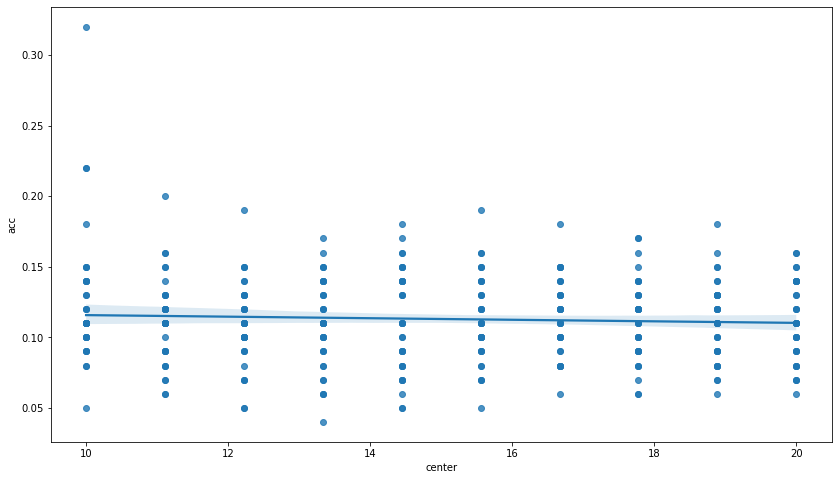

In [16]:
plt.figure(figsize=(14,8))
sns.regplot(x=df_acc["center"], y=df_acc["acc"])

In [18]:
df_acc.corr(method ='pearson')

,center,span,acc
center,1.000000e+00,-7.516896e-16,-0.056711
span,-7.516896e-16,1.000000e+00,0.040387
acc,-5.671115e-02,4.038734e-02,1.000000


/tmp/ipykernel_111938/1818450471.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


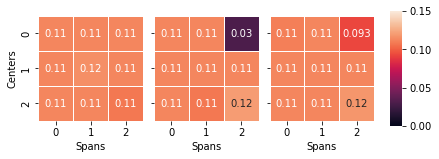

In [42]:
import seaborn as sns

fig, axs = plt.subplots(1,len(matrix.keys()), sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i in matrix.keys():
    sns.heatmap(matrix[i], annot=True, ax=axs[i], 
                linewidth=.5,
                cbar=i == 0,
                vmin=0, vmax=0.15,
                square=True,
                cbar_ax=None if i else cbar_ax)
    axs[i].set_xlabel('Spans')
axs[0].set_ylabel('Centers')
fig.tight_layout(rect=[0, 0, .9, 1])

In [ ]:
# Cehck if 

In [43]:
# Load data input to classifier:

In [45]:
data = np.load('./data/dataset_analysis/data_fft_10.0_10.0.npy')

In [46]:
data.shape

(2000, 10)

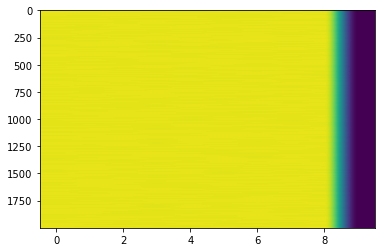

In [49]:
plt.imshow(data, aspect='auto')

In [50]:
data = np.load('./data/dataset_analysis/data_fft_10.0_15.0.npy')

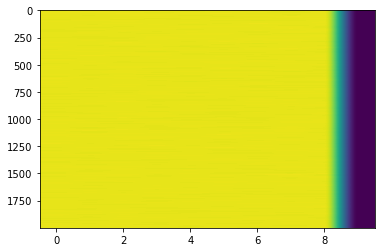

In [51]:
plt.imshow(data, aspect='auto')

In [54]:
data = np.load('./data/dataset_analysis/data_fft_20.0_10.0.npy')

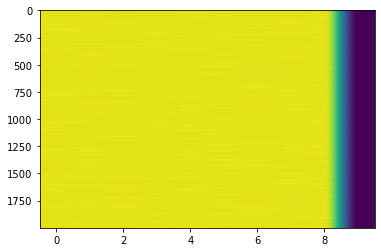

In [55]:
plt.imshow(data, aspect='auto')